# Finding the Relationship between Seasons, Genres, and more in Anime


In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from datetime import datetime as dt
import re

Mounted at /content/drive


In [2]:

an_df = pd.read_csv("/content/drive/MyDrive/CMSC320_Final_Project/AnimeRecent.csv")
# link to file btw https://www.kaggle.com/datasets/harits/anime-database-2022

# Feature Engineering
This dataset is very messy.

In [3]:
# Greg's Bit.
#an_df = pd.read_csv("AnimeRecent.csv") #Obtain data from AnimeRecent.csv file

an_df = an_df.drop(["Synopsis", "Synonyms", "Japanese", "ID", "Duration_Minutes"], axis=1)
an_df.loc[an_df['Type'] == 'Music'] = np.NaN #Remove Music Type
an_df.loc[an_df['Type'] == 'Unknown'] = np.NaN #Remove Unknown Type

pd.set_option('display.max_columns', 50)
an_df = an_df.dropna()
an_df = an_df.reset_index(drop=True)

#Extracting the Season and Year of the Premiere and make their own seperate columns
an_df = an_df.assign(Season=np.nan)
an_df = an_df.assign(Year=np.nan)
for i in range(0, len(an_df['Premiered'])):
    premiered = an_df['Premiered'].iloc[i]
    if 'Spring' in premiered :
        an_df['Season'].iloc[i] = 'Spring'
    elif 'Fall' in premiered :
        an_df['Season'].iloc[i] = 'Fall'
    elif 'Winter' in premiered :
        an_df['Season'].iloc[i] = 'Winter'
    elif 'Summer' in premiered :
        an_df['Season'].iloc[i] = 'Summer'
    if 'Unknown' in premiered :
        an_df['Season'].iloc[i] = 'Unknown'
        an_df['Year'].iloc[i] = 'Unknown'
    else :
        an_df['Year'].iloc[i] = premiered[len(premiered) - 4 : len(premiered)]   
an_df = an_df.drop(["Premiered"], axis = 1)

#Reorder Columns
an_df = an_df[['Title', 'English', 'Type', 'Episodes', 'Status', 'Season', 'Year', 'Start_Aired', 'End_Aired',
              'Broadcast', 'Producers', 'Licensors', 'Studios', 'Source', 'Genres', 'Themes', 'Demographics',
              'Rating', 'Score', 'Scored_Users', 'Ranked', 'Popularity', 'Members', 'Favorites']] 
    
an_df

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Title,English,Type,Episodes,Status,Season,Year,Start_Aired,End_Aired,Broadcast,Producers,Licensors,Studios,Source,Genres,Themes,Demographics,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,Shingeki no Kyojin,Attack on Titan,TV,25.0,Finished Airing,Spring,2013,"Apr 7, 2013","Sep 29, 2013",Sundays at 0158 (JST),"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"Action, Drama","Gore, Military, Survival",Shounen,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1.0,3524109.0,155695.0
1,Death Note,Death Note,TV,37.0,Finished Airing,Fall,2006,"Oct 4, 2006","Jun 27, 2007",Wednesdays at 0056 (JST),"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media,Madhouse,Manga,"Supernatural, Suspense",Psychological,Shounen,R - 17+ (violence & profanity),8.621,485487.0,732.0,2.0,3504535.0,159701.0
2,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist Brotherhood,TV,64.0,Finished Airing,Spring,2009,"Apr 5, 2009","Jul 4, 2010",Sundays at 1700 (JST),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,R - 17+ (violence & profanity),9.131,900398.0,12.0,3.0,2978455.0,207772.0
3,One Punch Man,One Punch Man,TV,12.0,Finished Airing,Fall,2015,"Oct 5, 2015","Dec 21, 2015",Mondays at 0105 (JST),"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media,Madhouse,Web manga,"Action, Comedy","Parody, Super Power",Seinen,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4.0,2879907.0,59651.0
4,Sword Art Online,Sword Art Online,TV,25.0,Finished Airing,Summer,2012,"Jul 8, 2012","Dec 23, 2012",Sundays at 0000 (JST),"Aniplex, Genco, DAX Production, ASCII Media Wo...",Aniplex of America,A-1 Pictures,Light novel,"Action, Adventure, Fantasy, Romance","Love Polygon, Video Game",Unknown,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5.0,2813565.0,64997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11840,Shiri Play,Unknown,Movie,1.0,Finished Airing,Unknown,Unknown,2005,Not Available,Unknown,Unknown,Unknown,Unknown,Original,Avant Garde,Unknown,Unknown,G - All Ages,4.941,132.0,124742.0,17264.0,215.0,0.0
11841,I'm Here,Unknown,Movie,1.0,Finished Airing,Unknown,Unknown,2015,Not Available,Unknown,Geidai Animation,Unknown,Unknown,Original,Avant Garde,Music,Unknown,G - All Ages,5.491,108.0,111452.0,17319.0,213.0,0.0
11842,Feed,Unknown,Movie,1.0,Finished Airing,Unknown,Unknown,2016,Not Available,Unknown,Tamabi,Unknown,Unknown,Original,Avant Garde,Music,Unknown,PG - Children,5.741,103.0,101852.0,17380.0,209.0,0.0
11843,Kawawawawawada,Unknown,Special,1.0,Finished Airing,Unknown,Unknown,2016,Not Available,Unknown,Unknown,Unknown,Unknown,Original,Unknown,Music,Unknown,G - All Ages,5.181,105.0,120402.0,17394.0,208.0,0.0


Machine Learning models are not well-suited for categorical data labeled with String objects. Therefore, it is in best interest to One-Hot encode the data. This essentially means creating a new feature and column based on the category. If the row supports the feature, the value in the new column is set to one. If now, the value is set to two. Now, all of our categorical data is easily interpretable by models.

In the Anime Dataset, the Themes, Genres, and Studio columns have categories. The oneHot_encode_col() function below takes any of these columns and creates a new dataframe with one-hot encoded data. This dataframe can then be attatched to the main an_df to be trained with a model.

Each column has a list of categories sepereted by a delimiter: ", ". By splitting the String using the split() function, we are able to get a list of categories for a particular row. First, we get a list of all unique categories in the column. We store this in a dictionary where the keys are the category name, and the column will be a list of size len(an_df). Second, we fill that list with ones and zeroes depending on if the category exists in that specific row or not. Finally, we return the new dataframe.

In [ ]:
# My Part: One hot encoding.

# should we also remove rows that have genre/studio?

# can one-hot enode any column with categories
# in this dataset, categories are split with ", "
def oneHot_encode_col(col):
  
  # create a list of all categories
  all_cats = {}
  for cat_info in an_df[col]:
    splt = cat_info.split(", ")
    for cat in splt:
      if (cat in all_cats):
        pass
      else:
        all_cats[cat] = []

  # for testing purposes
  # print(all_cats)

  # if the column has a speific category,
  # it lables that row with a 1. else, it
  # lables that category with a 0.
  for cat_info in an_df[col]:
    splt = cat_info.split(", ")
    for main_cats in all_cats:
      if (main_cats in splt):
        all_cats[main_cats].append(1)
      else:
        all_cats[main_cats].append(0)

  # return a df with one-hot encoded data.
  # this is done to make sure an_df isn't 
  return pd.DataFrame.from_dict(all_cats)
    

# one-hot encode the columns (test) cluttered
temp = oneHot_encode_col("Themes")
temp.head()

,Gore,Military,Survival,Psychological,Parody,Super Power,Love Polygon,Video Game,School,Martial Arts,Historical,Unknown,Romantic Subtext,Time Travel,Isekai,Strategy Game,Mecha,Music,Mythology,High Stakes Game,Team Sports,Reincarnation,Adult Cast,Space,Detective,...,Harem,Mahou Shoujo,Visual Arts,Samurai,Crossdressing,Reverse Harem,Childcare,Delinquents,CGDCT,Gag Humor,Organized Crime,Otaku Culture,Workplace,Iyashikei,Anthropomorphic,Educational,Medical,Showbiz,Combat Sports,Idols (Female),Performing Arts,Racing,Magical Sex Shift,Idols (Male),Pets
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Originally, we were going to change the Start_Aired and Broadcast columns into datetime objects, but we decided against it. We already have data for Season and Year, which are the main features we are looking for when comparing anime popularity.

At the same time however, we noticed that there were many Unknown values for Season. We decided to make a graph of the number of animes per year. This should help us know when to truncate the dataset. This usually occurs during the earlier years, and during this time, Anime was not that popular worldwide (maybe a source here?). We decided to truncate the lower end of the dataset to 1990.

In [ ]:
# scrapped function make_dt
def make_dt(year, start, end):
  return "NaT"


# make a graph of the number of anime per year.
# groupBy to make this a bit easier to view.

angb = an_df.groupby("Year")

year = []
num_anime = []
for yrtup in angb:
  year.append(yrtup[0])
  num_anime.append(len(yrtup[1]))

print(year)
print(num_anime)

# fig, ax = plt.subplots()
# ax.bar(year, num_anime)

['1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', 'Unknown']
[1, 1, 4, 3, 4, 6, 7, 7, 8, 7, 12, 10, 16, 15, 19, 21, 23, 19, 23, 25, 28, 23, 34, 29, 18, 24, 24, 30, 30, 21, 30, 31, 19, 32, 32, 33, 38, 69, 83, 55, 83, 80, 98, 120, 108, 162, 133, 131, 123, 105, 141, 150, 176, 195, 191, 221, 211, 220, 174, 160, 186, 123, 7640]


However, there was a much bigger issue at hand. There are 7640 anime labled with the year "Unknown". Upon further inspection, some of these "Unknown" animes have do have a year in the Start_Aired column. So, we wrote a small function to extract the year from Start_Aired and use that as the Year. If it doesn't have that information, the row will be dropped.

In [ ]:
# Fix unknown.


In [ ]:
# groupby year
angb = an_df.groupby("Year")


data = ([],[])

# iterating over groupby returns a tuple for yr
# yr[0] is the year (title of groupby) and yr[1] is a df that is the rows grouped.
for yr in angb:
    if (yr[0] != "Unknown"):
      data[0].append(yr[0])
      #data[1].append(list(yr[1][0]["Score"]))
      #target.append( [yr[0],yr[1]["lifeExp"]]  )

# print(data)
# fig, ax = plt.subplots()

# ax.scatter(data[0],data[1])





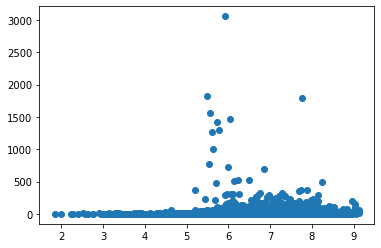

In [ ]:
# episodes vs score
dat = ([],[])
for idx,row in an_df.iterrows():
  dat[0].append(row["Score"])
  dat[1].append(row["Episodes"])

fig,ax = plt.subplots()
ax.scatter(dat[0],dat[1])
fig.show()

# lets not do anything with eopisodes lmao....3000 outlier.

In [ ]:
# GroupBy season and then by year.
angb = an_df.groupby(["Season", "Year"])

# should we start from 1995 and above?


for x in angb:
  print(x[0])


('Fall', '1963')
('Fall', '1965')
('Fall', '1966')
('Fall', '1967')
('Fall', '1968')
('Fall', '1969')
('Fall', '1970')
('Fall', '1971')
('Fall', '1972')
('Fall', '1973')
('Fall', '1974')
('Fall', '1975')
('Fall', '1976')
('Fall', '1977')
('Fall', '1978')
('Fall', '1979')
('Fall', '1980')
('Fall', '1981')
('Fall', '1982')
('Fall', '1983')
('Fall', '1984')
('Fall', '1985')
('Fall', '1986')
('Fall', '1987')
('Fall', '1988')
('Fall', '1989')
('Fall', '1990')
('Fall', '1991')
('Fall', '1992')
('Fall', '1993')
('Fall', '1994')
('Fall', '1995')
('Fall', '1996')
('Fall', '1997')
('Fall', '1998')
('Fall', '1999')
('Fall', '2000')
('Fall', '2001')
('Fall', '2002')
('Fall', '2003')
('Fall', '2004')
('Fall', '2005')
('Fall', '2006')
('Fall', '2007')
('Fall', '2008')
('Fall', '2009')
('Fall', '2010')
('Fall', '2011')
('Fall', '2012')
('Fall', '2013')
('Fall', '2014')
('Fall', '2015')
('Fall', '2016')
('Fall', '2017')
('Fall', '2018')
('Fall', '2019')
('Fall', '2020')
('Fall', '2021')
('Spring', '19

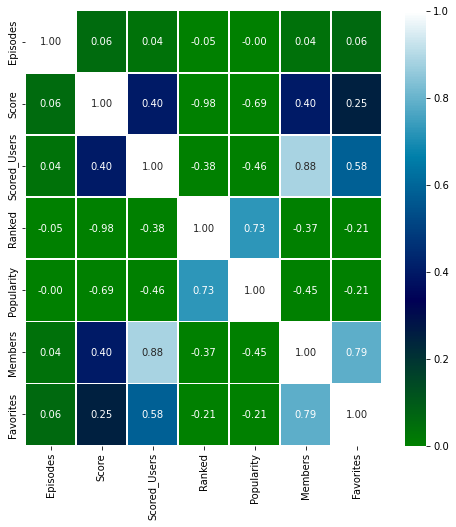

In [4]:
fig, ax = plt.subplots(figsize=(8,8))
an_corr = an_df.corr() #Computes correlation of columns, excluding NaN values
an_heatmap = sb.heatmap(an_corr, ax=ax, annot=True, cmap='ocean', fmt=".2f", linewidths=.5, vmin=0, vmax=1)
None